# US Coastline Shapefile Visualization

This notebook demonstrates how to load, explore, and visualize the US coastline shapefile data using various geospatial libraries.

## Overview
- Load and examine the US coastline shapefile
- Display basic information about the dataset
- Create static and interactive visualizations
- Explore different mapping techniques


In [1]:
%pip install geopandas matplotlib folium

/Users/liang.cheng/Documents/advana/databricks-geosptial-notebooks/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('default')

print("Libraries imported successfully!")


Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


/Users/liang.cheng/Documents/advana/databricks-geosptial-notebooks/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## 1. Load and Examine the Shapefile


In [3]:
# Load the US coastline shapefile
shapefile_path = "data/tl_2023_us_coastline/tl_2023_us_coastline.shp"

try:
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)
    print("✅ Shapefile loaded successfully!")
    print(f"Shape: {gdf.shape}")
    print(f"CRS: {gdf.crs}")
    print(f"Columns: {list(gdf.columns)}")
    
    # Display basic information
    print("\n📊 Dataset Information:")
    print(f"Number of features: {len(gdf)}")
    print(f"Geometry type: {gdf.geometry.geom_type.unique()}")
    print(f"Bounds: {gdf.total_bounds}")
    
except Exception as e:
    print(f"❌ Error loading shapefile: {e}")
    print("Make sure the shapefile exists and all required files (.shp, .shx, .dbf, .prj) are present.")


✅ Shapefile loaded successfully!
Shape: (4236, 3)
CRS: EPSG:4269
Columns: ['NAME', 'MTFCC', 'geometry']

📊 Dataset Information:
Number of features: 4236
Geometry type: ['LineString']
Bounds: [-179.147236  -14.548699  179.77847    71.39038 ]


In [4]:
# Display the first few rows of the dataset
if 'gdf' in locals():
    print("📋 First 5 rows of the dataset:")
    display(gdf.head())
    
    print("\n📋 Dataset info:")
    print(gdf.info())
    
    print("\n📋 Statistical summary:")
    print(gdf.describe())


📋 First 5 rows of the dataset:


,NAME,MTFCC,geometry
0,Atlántico,L4150,"LINESTRING (-66.01689 18.44877, -66.01688 18.4..."
1,Atlántico,L4150,"LINESTRING (-65.56333 18.37807, -65.56335 18.3..."
2,Atlántico,L4150,"LINESTRING (-65.59793 18.39765, -65.59792 18.3..."
3,Atlántico,L4150,"LINESTRING (-65.55133 18.37372, -65.55134 18.3..."
4,Atlántico,L4150,"LINESTRING (-65.56089 18.3754, -65.56091 18.37..."



📋 Dataset info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4236 entries, 0 to 4235
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NAME      4236 non-null   object  
 1   MTFCC     4236 non-null   object  
 2   geometry  4236 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 99.4+ KB
None

📋 Statistical summary:
           NAME  MTFCC                                           geometry
count      4236   4236                                               4236
unique        8      1                                               4236
top     Pacific  L4150  LINESTRING (-66.016887 18.448772, -66.016876 1...
freq       1901   4236                                                  1


## 2. Static Visualization with Matplotlib


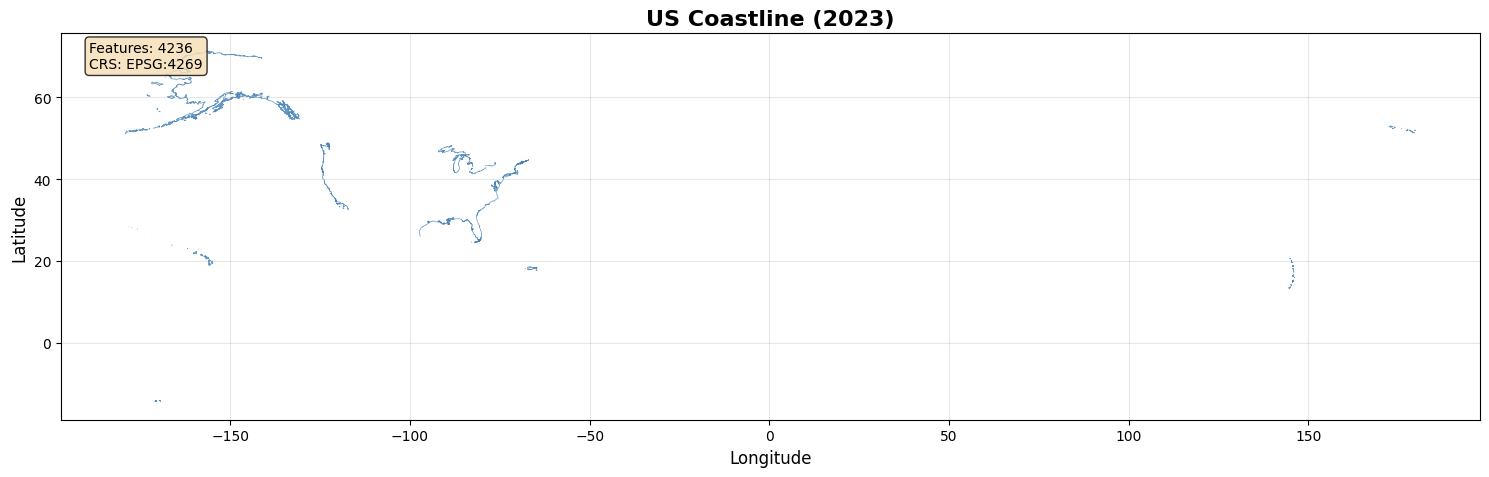

✅ Static plot created successfully!
📊 Displaying 4236 coastline features


In [5]:
# Create a basic static plot
if 'gdf' in locals():
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    
    # Plot the coastline
    gdf.plot(ax=ax, color='steelblue', linewidth=0.5, alpha=0.8)
    
    # Customize the plot
    ax.set_title('US Coastline (2023)', fontsize=16, fontweight='bold')
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Add a text box with information
    info_text = f'Features: {len(gdf)}\nCRS: {gdf.crs}'
    ax.text(0.02, 0.98, info_text, transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Static plot created successfully!")
    print(f"📊 Displaying {len(gdf)} coastline features")


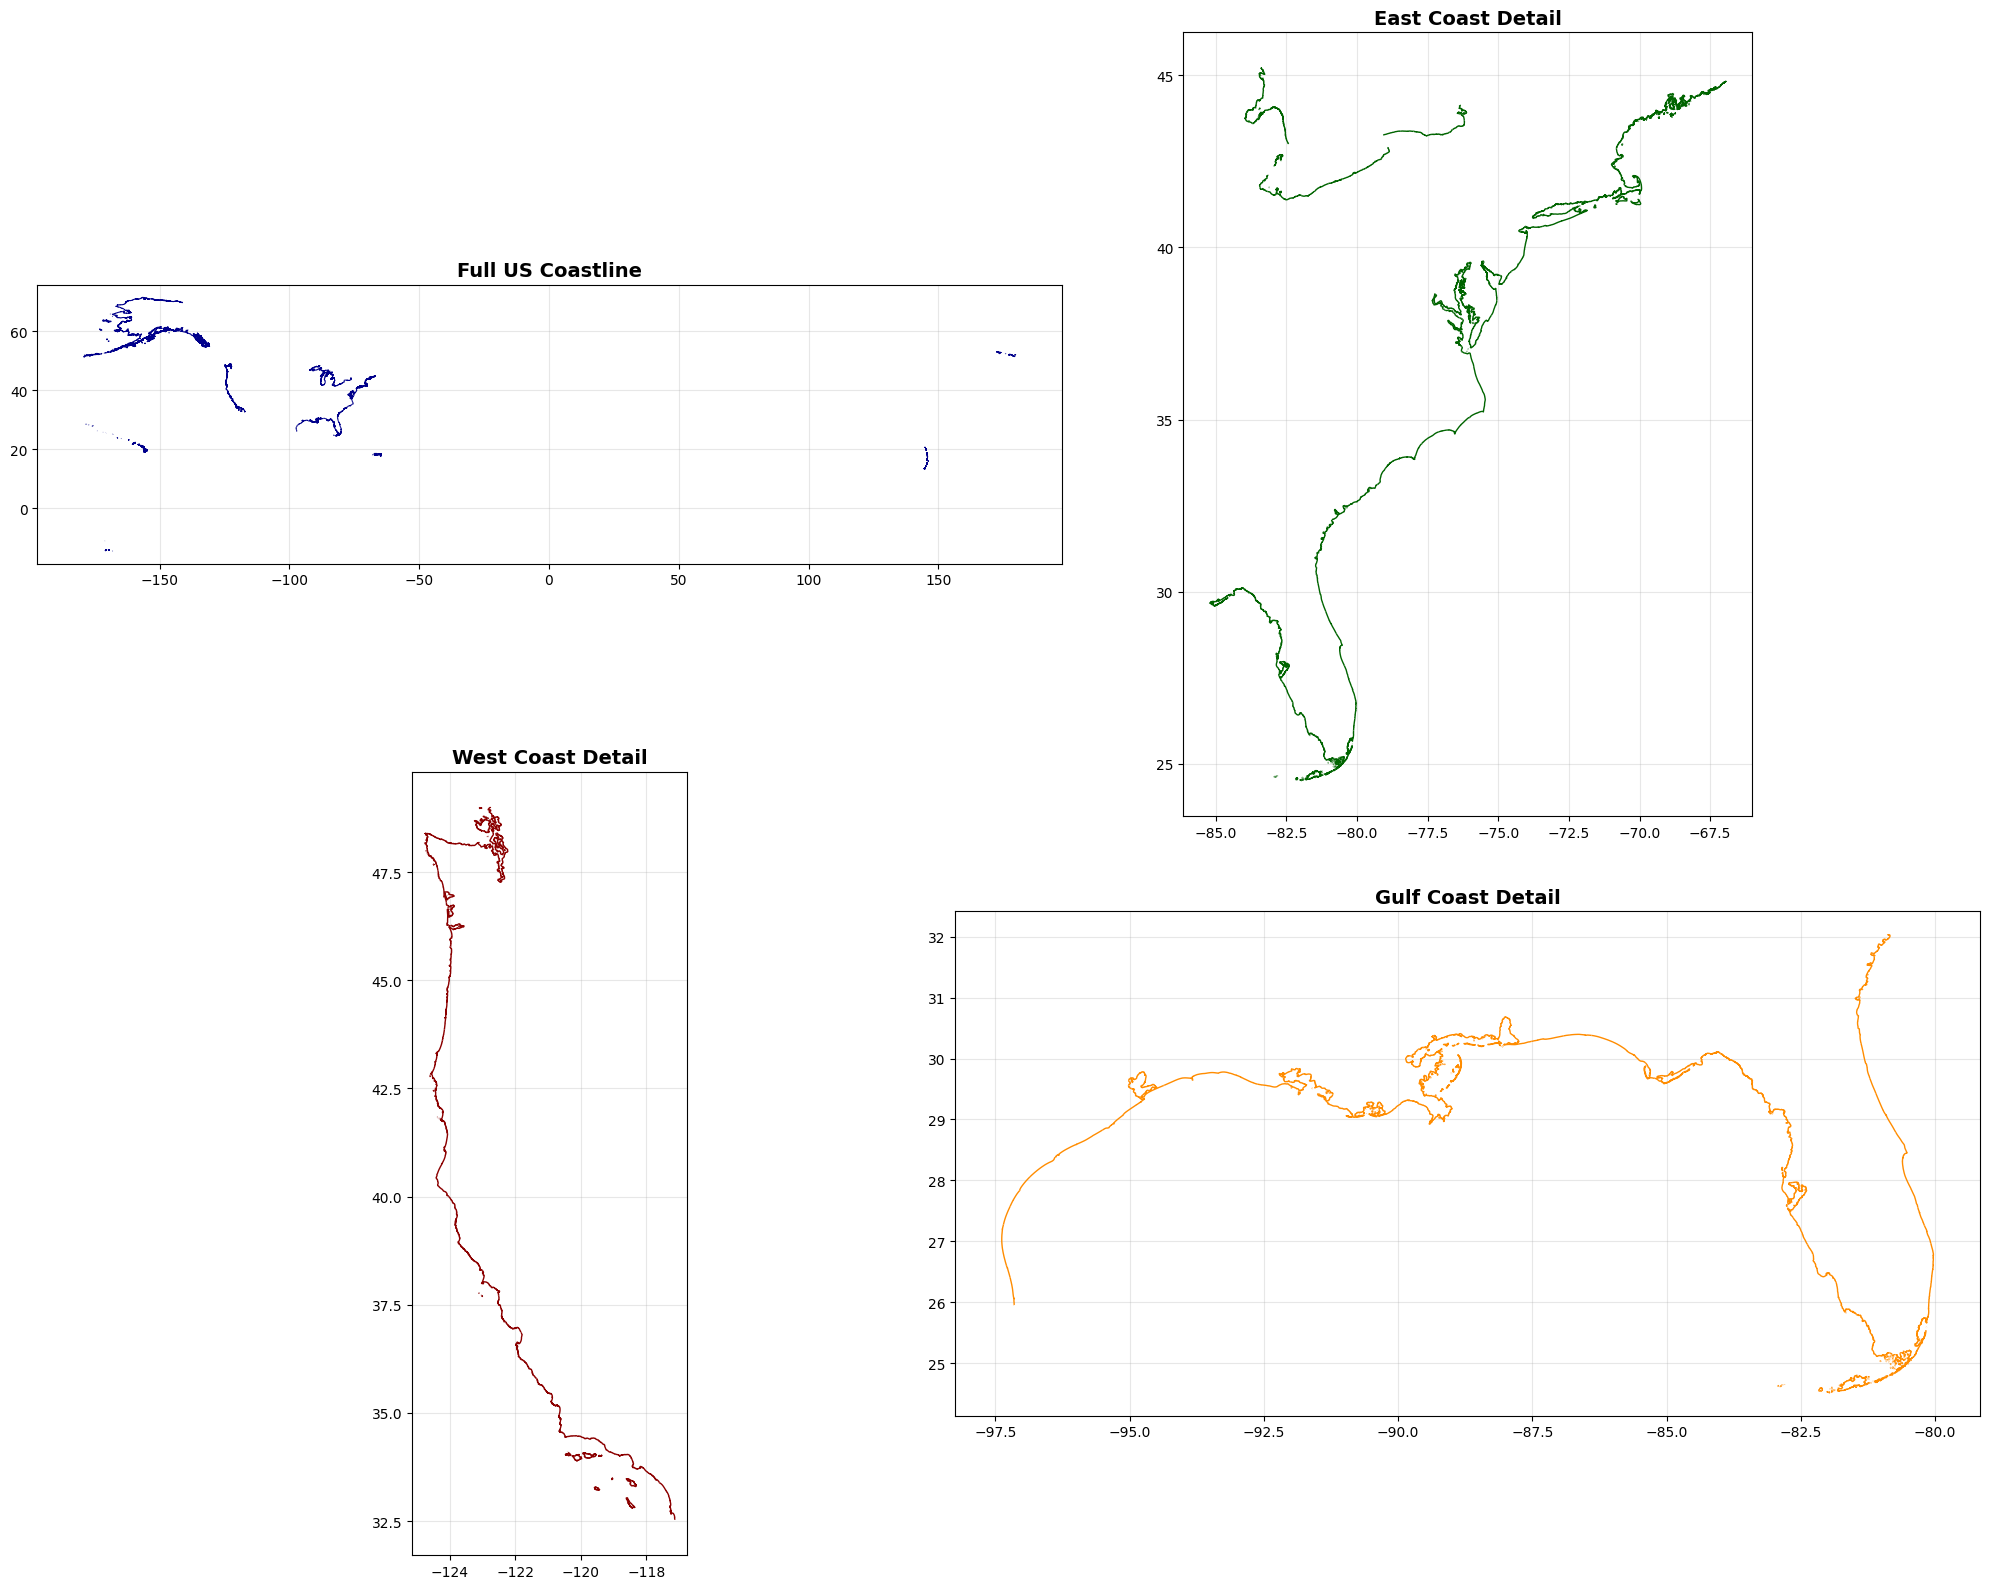

✅ Regional detail plots created successfully!


In [6]:
# Create a more detailed visualization with different regions
if 'gdf' in locals():
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()
    
    # Plot 1: Full US coastline
    gdf.plot(ax=axes[0], color='darkblue', linewidth=0.8)
    axes[0].set_title('Full US Coastline', fontsize=14, fontweight='bold')
    axes[0].grid(True, alpha=0.3)
    
    # Plot 2: East Coast (zoom)
    east_bounds = [-85, -65, 24, 45]  # [minx, maxx, miny, maxy]
    gdf_clipped = gdf.cx[east_bounds[0]:east_bounds[1], east_bounds[2]:east_bounds[3]]
    gdf_clipped.plot(ax=axes[1], color='darkgreen', linewidth=1.0)
    axes[1].set_title('East Coast Detail', fontsize=14, fontweight='bold')
    axes[1].grid(True, alpha=0.3)
    
    # Plot 3: West Coast (zoom)
    west_bounds = [-130, -110, 25, 50]
    gdf_clipped_west = gdf.cx[west_bounds[0]:west_bounds[1], west_bounds[2]:west_bounds[3]]
    gdf_clipped_west.plot(ax=axes[2], color='darkred', linewidth=1.0)
    axes[2].set_title('West Coast Detail', fontsize=14, fontweight='bold')
    axes[2].grid(True, alpha=0.3)
    
    # Plot 4: Gulf Coast (zoom)
    gulf_bounds = [-100, -80, 24, 32]
    gdf_clipped_gulf = gdf.cx[gulf_bounds[0]:gulf_bounds[1], gulf_bounds[2]:gulf_bounds[3]]
    gdf_clipped_gulf.plot(ax=axes[3], color='darkorange', linewidth=1.0)
    axes[3].set_title('Gulf Coast Detail', fontsize=14, fontweight='bold')
    axes[3].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("✅ Regional detail plots created successfully!")


## 3. Interactive Visualization with Folium


In [7]:
# Create an interactive map with Folium
if 'gdf' in locals():
    # Calculate the center of the bounding box
    bounds = gdf.total_bounds
    center_lat = 39.8283
    center_lon = -98.5795

    gdf_simple = gdf.copy()
    gdf_simple['geometry'] = gdf_simple['geometry'].simplify(
        tolerance=1000, # tolerance of 1000 meters, connecting line segments smaller than 1000 meters
        preserve_topology=True
    )
    
    # Create the base map
    m = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=4,
        tiles='OpenStreetMap'
    )
    
    # Convert to WGS84 if needed for folium
    if gdf_simple.crs != 'EPSG:4326':
        gdf_wgs84 = gdf_simple.to_crs('EPSG:4326')
    else:
        gdf_wgs84 = gdf_simple
    
    # Add the coastline to the map
    folium.GeoJson(
        gdf_wgs84.__geo_interface__,
        style_function=lambda feature: {
            'fillColor': 'lightblue',
            'color': 'darkblue',
            'weight': 2,
            'fillOpacity': 0.3,
            'opacity': 0.8
        },
        popup=folium.Popup('US Coastline 2023', parse_html=True)
    ).add_to(m)
    
    # Add a marker at the center
    folium.Marker(
        [center_lat, center_lon],
        popup='US Coastline Center',
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)
    
    # Add layer control
    folium.LayerControl().add_to(m)
    
    # Display the map
    display(m)
    
    print("✅ Interactive map created successfully!")
    print(f"📍 Center coordinates: {center_lat:.4f}, {center_lon:.4f}")
    print(f"🗺️  Map bounds: {bounds}")


✅ Interactive map created successfully!
📍 Center coordinates: 39.8283, -98.5795
🗺️  Map bounds: [-179.147236  -14.548699  179.77847    71.39038 ]


In [8]:
# Create a more advanced interactive map with multiple layers
if 'gdf' in locals() and 'gdf_simple' in locals():
    # Create a map with multiple tile layers
    m2 = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=4,
        tiles=None
    )
    
    # Add different tile layers
    folium.TileLayer('OpenStreetMap', name='OpenStreetMap').add_to(m2)
    folium.TileLayer('CartoDB positron', name='CartoDB Positron').add_to(m2)
    folium.TileLayer('CartoDB dark_matter', name='CartoDB Dark').add_to(m2)
    
    # Add the coastline with different styling
    folium.GeoJson(
        gdf_wgs84.__geo_interface__,
        style_function=lambda feature: {
            'fillColor': 'lightcoral',
            'color': 'darkred',
            'weight': 3,
            'fillOpacity': 0.2,
            'opacity': 1.0
        },
        popup=folium.Popup('US Coastline 2023', parse_html=True),
        name='US Coastline'
    ).add_to(m2)
    
    # Add some major cities as markers
    major_cities = [
        {'name': 'New York', 'lat': 40.7128, 'lon': -74.0060},
        {'name': 'Los Angeles', 'lat': 34.0522, 'lon': -118.2437},
        {'name': 'Miami', 'lat': 25.7617, 'lon': -80.1918},
        {'name': 'Seattle', 'lat': 47.6062, 'lon': -122.3321},
        {'name': 'Houston', 'lat': 29.7604, 'lon': -95.3698}
    ]
    
    for city in major_cities:
        folium.Marker(
            [city['lat'], city['lon']],
            popup=city['name'],
            icon=folium.Icon(color='blue', icon='star')
        ).add_to(m2)
    
    # Add a heatmap layer (simplified)
    from folium.plugins import HeatMap
    
    # Sample some points along the coastline for heatmap
    sample_points = []
    for idx, geom in enumerate(gdf_wgs84.geometry):
        if idx % 10 == 0:  # Sample every 10th feature
            coords = list(geom.coords)
            for coord in coords[::5]:  # Sample every 5th coordinate
                sample_points.append([coord[1], coord[0]])  # lat, lon
    
    if sample_points:
        HeatMap(sample_points, name='Coastline Density').add_to(m2)
    
    # Add layer control
    folium.LayerControl().add_to(m2)
    
    # Add a legend
    legend_html = '''
    <div style="position: fixed; 
                bottom: 50px; left: 50px; width: 200px; height: 90px; 
                background-color: white; border:2px solid grey; z-index:9999; 
                font-size:14px; padding: 10px">
    <p><b>US Coastline Map</b></p>
    <p><i class="fa fa-map-marker fa-2x" style="color:red"></i> Major Cities</p>
    <p><i class="fa fa-star fa-2x" style="color:blue"></i> Coastline</p>
    </div>
    '''
    m2.get_root().html.add_child(folium.Element(legend_html))
    
    # Display the map
    display(m2)
    
    print("✅ Advanced interactive map created successfully!")
    print(f"🏙️  Added {len(major_cities)} major cities as markers")
    print(f"🔥 Added heatmap with {len(sample_points)} sample points")


✅ Advanced interactive map created successfully!
🏙️  Added 5 major cities as markers
🔥 Added heatmap with 428 sample points
